Project: Customer Segmentation using K-Means Clustering
Objective:
- To segment mall customers into distinct groups based on their purchasing
   behavior and demographic attributes.

Why:
 - Helps businesses target marketing campaigns effectively.
 - Enables personalized customer experiences.

 Dataset:
 - Mall_Customers.csv
 - Contains customer details like Gender, Age, Annual Income, and Spending Score.

 Steps:
 1. Import necessary libraries and load the dataset.
 2. Explore and preprocess the data.
 3. Use K-Means clustering to group customers.
 4. Visualize clusters and interpret results.



Importing the Dependencies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

Data Collection & Analysis

In [4]:
# loading the data from csv file to a Pandas DataFrame
customer_data = pd.read_csv("D:\\Project Document\\Project\\Python\\customer segmentation using k-means\\Mall_Customers.csv")

In [5]:
# first 5 rows in the dataframe
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
# finding the number of rows and columns
customer_data.shape

(200, 5)

In [7]:
# getting some informations about the dataset
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Check for Missing Values

In [8]:
# checking for missing values
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Visualize Feature Distributions (Age, Income, Spending Score)

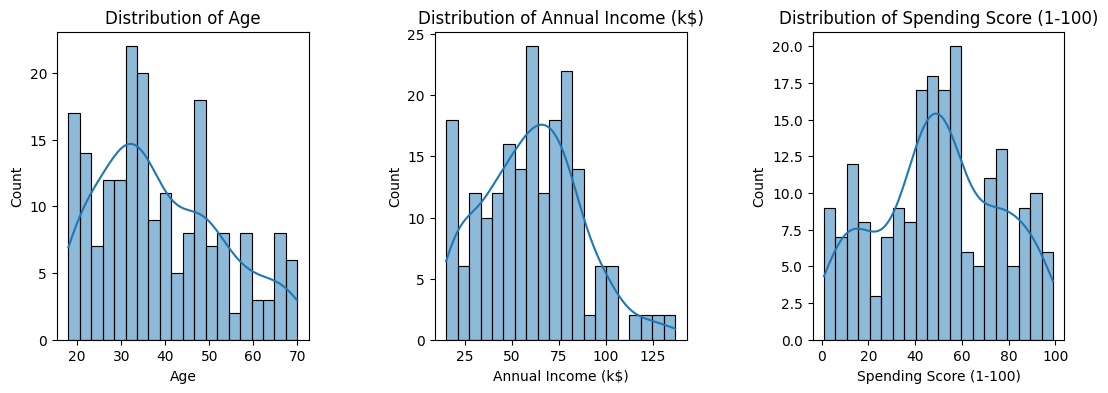

In [9]:
plt.figure(1, figsize=(13,4))
n = 0
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.histplot(customer_data[x], bins=20, kde=True)  # use histplot instead
    plt.title(f'Distribution of {x}')
plt.show()


Gender Distribution Visualization

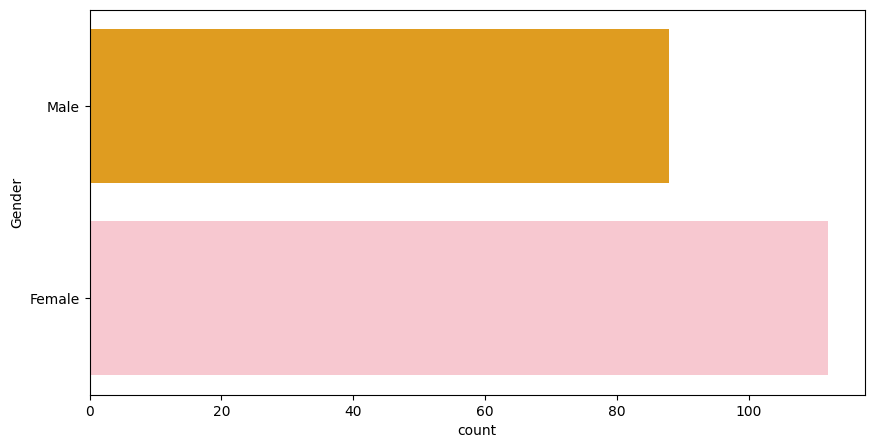

In [10]:
plt.figure(figsize=(10, 5))
sns.countplot(y="Gender", data=customer_data,hue="Gender",
              palette={"Male": "orange", "Female": "pink"})
plt.show()

 Age Group Distribution Analysis

C:\Users\bijoy\AppData\Local\Temp\ipykernel_14572\3709619026.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=agex, y=agey, palette="mako")


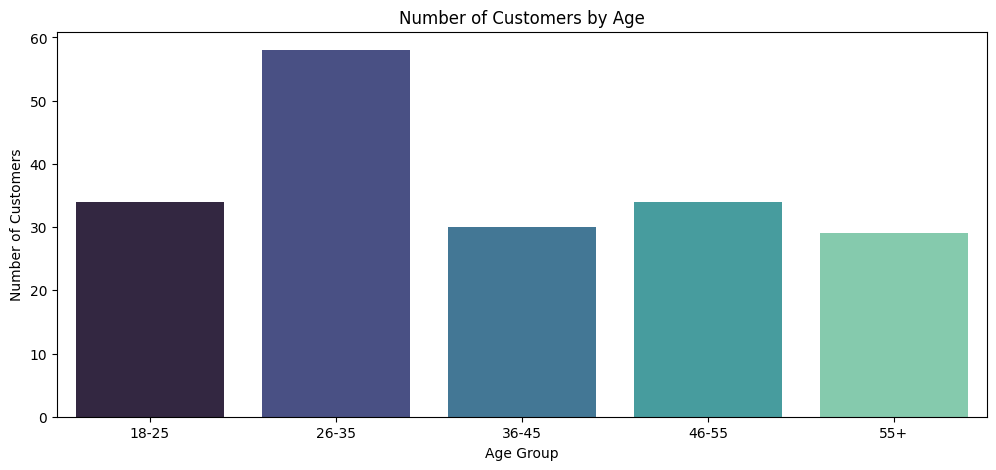

In [11]:
age_18_25 = customer_data.Age[(customer_data.Age > 18) & (customer_data.Age <= 25)]
age_26_35 = customer_data.Age[(customer_data.Age > 26) & (customer_data.Age <= 35)]
age_36_45 = customer_data.Age[(customer_data.Age > 36) & (customer_data.Age <= 45)]
age_46_55 = customer_data.Age[(customer_data.Age > 46) & (customer_data.Age <= 55)]
age_55above = customer_data.Age[customer_data.Age >= 56]

agex = ["18-25", "26-35", "36-45", "46-55", "55+"]
agey = [
    len(age_18_25),
    len(age_26_35),
    len(age_36_45),
    len(age_46_55),
    len(age_55above)
]

plt.figure(figsize=(12, 5))
sns.barplot(x=agex, y=agey, palette="mako")
plt.title("Number of Customers by Age")
plt.xlabel("Age Group")
plt.ylabel("Number of Customers")
plt.show()


 Bivariate Analysis: Annual Income vs Spending Score by Gender


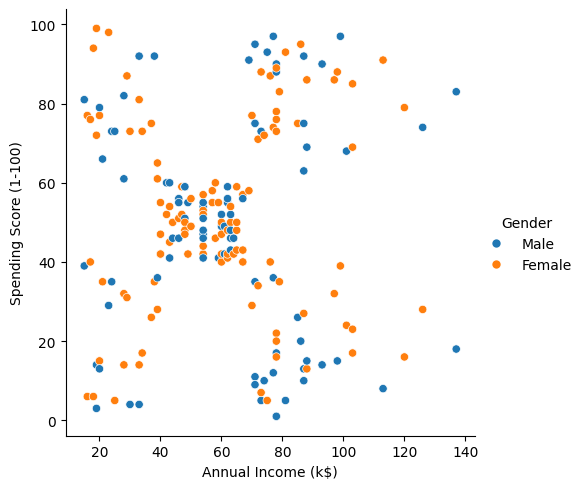

In [12]:
sns.relplot(
    x="Annual Income (k$)",
    y="Spending Score (1-100)",
    hue="Gender",
    data=customer_data
)


  Customer Count by Spending Score Range


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is customer_data
ss_1_20 = customer_data["Spending Score (1-100)"][(customer_data["Spending Score (1-100)"] >= 1) & (customer_data["Spending Score (1-100)"] <= 20)]
ss_21_40 = customer_data["Spending Score (1-100)"][(customer_data["Spending Score (1-100)"] >= 21) & (customer_data["Spending Score (1-100)"] <= 40)]
ss_41_60 = customer_data["Spending Score (1-100)"][(customer_data["Spending Score (1-100)"] >= 41) & (customer_data["Spending Score (1-100)"] <= 60)]
ss_61_80 = customer_data["Spending Score (1-100)"][(customer_data["Spending Score (1-100)"] >= 61) & (customer_data["Spending Score (1-100)"] <= 80)]
ss_81_100 = customer_data["Spending Score (1-100)"][(customer_data["Spending Score (1-100)"] >= 81) & (customer_data["Spending Score (1-100)"] <= 100)]

ssx = ["1-20", "21-40", "41-60", "61-80", "81-100"]
ssy = [len(ss_1_20), len(ss_21_40), len(ss_41_60), len(ss_61_80), len(ss_81_100)]

plt.figure(figsize=(10, 6))
sns.barplot(x=ssx, y=ssy, palette="rocket")
plt.title("Spending Scores")
plt.xlabel("Score Range")
plt.ylabel("Number of Customers")
plt.show()


NameError: name 'customer_data' is not defined

C:\Users\bijoy\AppData\Local\Temp\ipykernel_14572\1627545675.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=aix, y=aiy, palette="Spectral")


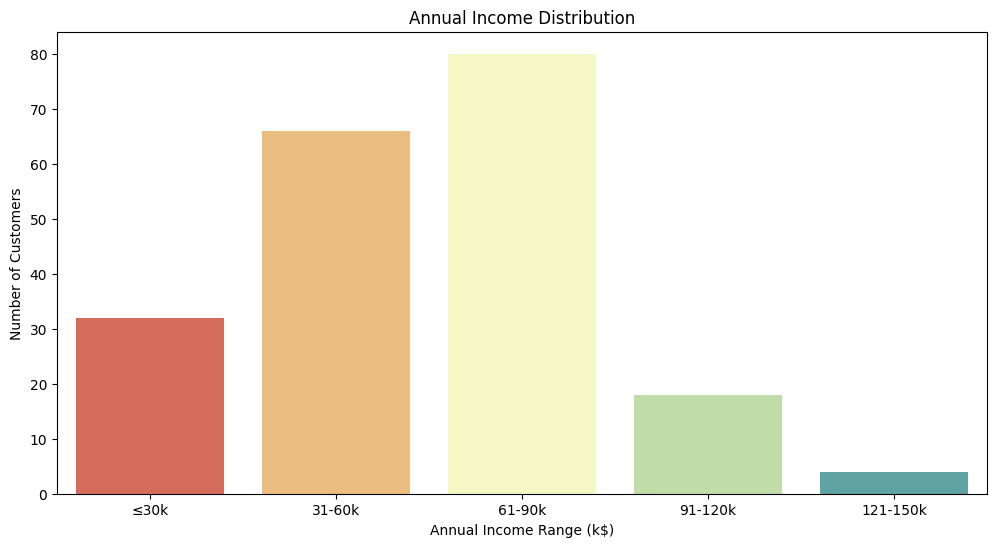

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Annual Income Groups
aie_30 = customer_data["Annual Income (k$)"][(customer_data["Annual Income (k$)"] >= 0) & (customer_data["Annual Income (k$)"] <= 30)]
ai31_60 = customer_data["Annual Income (k$)"][(customer_data["Annual Income (k$)"] >= 31) & (customer_data["Annual Income (k$)"] <= 60)]
ai61_90 = customer_data["Annual Income (k$)"][(customer_data["Annual Income (k$)"] >= 61) & (customer_data["Annual Income (k$)"] <= 90)]
ai91_120 = customer_data["Annual Income (k$)"][(customer_data["Annual Income (k$)"] >= 91) & (customer_data["Annual Income (k$)"] <= 120)]
ai121_150 = customer_data["Annual Income (k$)"][(customer_data["Annual Income (k$)"] >= 121) & (customer_data["Annual Income (k$)"] <= 150)]

# Labels
aix = ["≤30k", "31-60k", "61-90k", "91-120k", "121-150k"]

# Counts
aiy = [len(aie_30), len(ai31_60), len(ai61_90), len(ai91_120), len(ai121_150)]

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=aix, y=aiy, palette="Spectral")
plt.title("Annual Income Distribution")
plt.xlabel("Annual Income Range (k$)")
plt.ylabel("Number of Customers")
plt.show()


Elbow Method to Determine Optimal Clusters

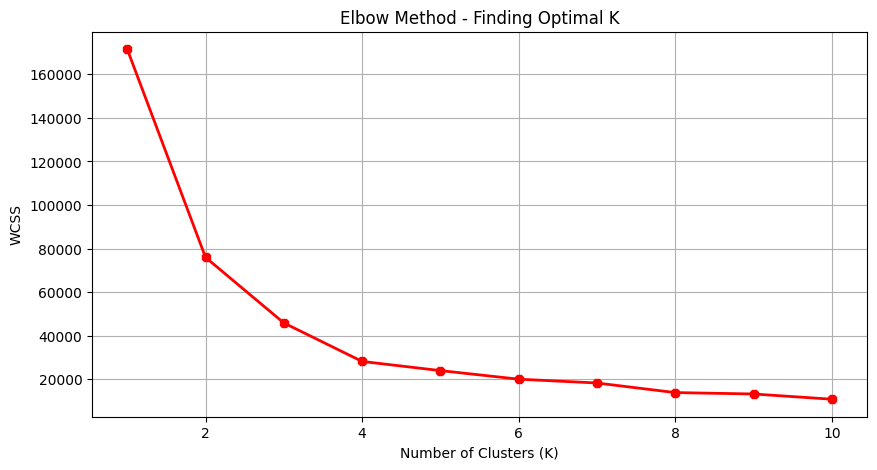

In [21]:

# Select features
X1 = customer_data.loc[:, ["Age", "Spending Score (1-100)"]].values

# Calculate WCSS
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42)
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, linewidth=2, color="red", marker="8")
plt.title("Elbow Method - Finding Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.grid()
plt.show()


Apply K-Means Clustering

In [16]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(X1)

print(Y)

[4 1 2 1 4 1 2 1 2 1 2 1 2 1 2 1 3 4 3 1 3 1 2 1 2 1 3 4 3 1 2 1 2 1 2 1 2
 1 2 1 0 1 3 4 2 4 3 4 4 4 3 4 4 0 3 3 3 0 4 3 0 4 0 0 0 4 3 0 4 4 0 3 0 0
 0 4 3 3 4 3 0 3 0 3 4 3 0 4 4 3 0 4 3 3 4 4 3 4 3 4 4 3 0 4 3 4 0 3 0 0 0
 4 3 4 4 4 0 3 3 3 4 3 3 1 4 1 3 1 2 1 2 1 4 1 2 1 2 1 2 1 2 1 4 1 2 1 3 1
 2 1 2 1 2 1 2 1 2 1 2 1 3 1 2 1 2 1 2 1 2 4 2 1 2 1 2 1 2 1 2 1 3 1 2 1 3
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


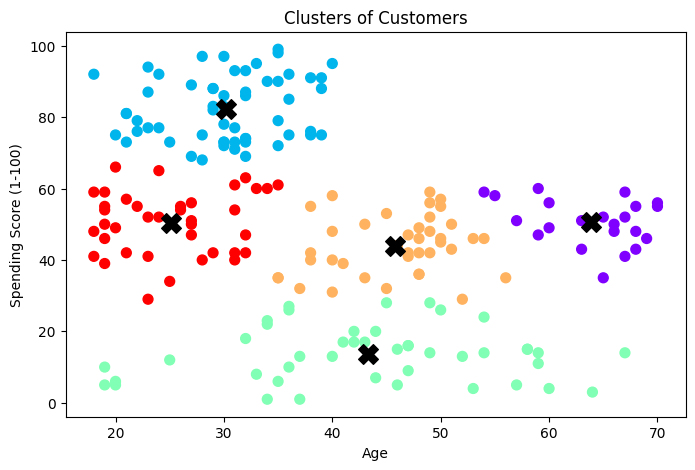

In [17]:
import matplotlib.pyplot as plt

# Scatter plot of clusters
plt.figure(figsize=(8,5))
plt.scatter(X1[:, 0], X1[:, 1], c=kmeans.labels_, cmap="rainbow", s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color="black", marker="X", s=200)

plt.title("Clusters of Customers")
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.show()


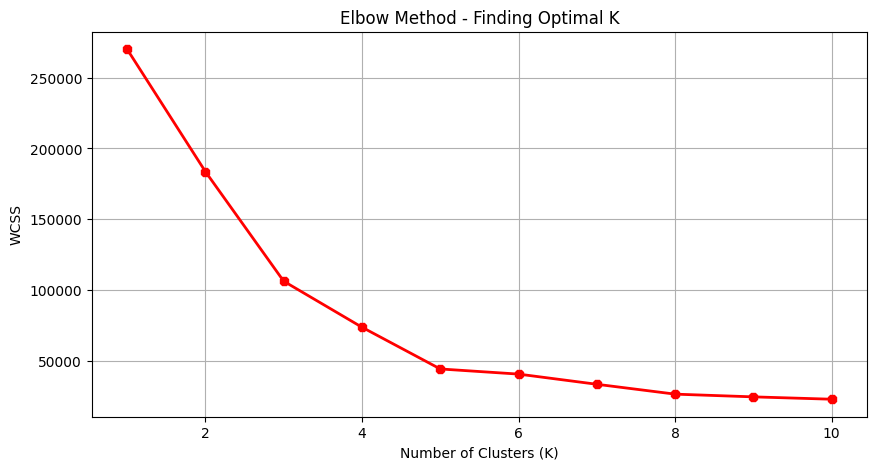

In [18]:
X2 = customer_data.loc[:, ["Annual Income (k$)", "Spending Score (1-100)"]].values

# Calculate WCSS
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42)
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, linewidth=2, color="red", marker="8")
plt.title("Elbow Method - Finding Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.grid()
plt.show()

In [19]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(X2)

print(Y)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


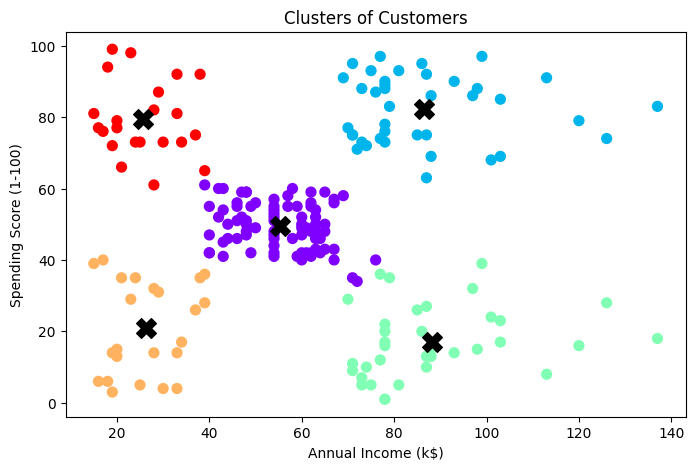

In [20]:
# Scatter plot of clusters
plt.figure(figsize=(8,5))
plt.scatter(X2[:, 0], X2[:, 1], c=kmeans.labels_, cmap="rainbow", s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color="black", marker="X", s=200)

plt.title("Clusters of Customers")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()
